# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas de Captura e Tratamento de Dados</span>

## <span style="color:blue">Avaliação Final</span>
**Luis Gustavo Nonato** e **Moacir Antonelli Ponti**<br>

**Cemeai - ICMC/USP São Carlos**

A avaliação vale 10 pontos. As questões de 1 a 4, caso respondidas da forma correta, já totalizam 10 pontos.


<font color='red'>**ATENÇÃO:** Quando terminar o exame, você deve fazer um "upload" do notebook no _moodle_</font>.

### Questão 1 (2.5 pontos)
Considere o arquivo <font style="font-family: monaco"> modcovid.pdf </font> (disponível para download no moodle). Escreva um código para extrair o texto (ASCII) do arquivo PDF e escreva o texto extraído em um arquivo chamado ``modcovid.txt``.


In [1]:
# IMPORTAÇÃO DAS BIBLIOTECAS UTILIZADAS
from PIL import Image 
import pytesseract as ocr
from pdf2image import convert_from_path 
import glob

# EXTRAI O PDF E SALVA EM UMA VARIÁVEL
imagem_paginas = convert_from_path('pdf_files/modcovid.pdf')

# SALVA O PDF EM IMAGENS
for i, pagina in enumerate(imagem_paginas): 
    filename = "pagina_"+str(i)+".png"
      
    # Salvando a imagen da página em um arquivo
    print('Gravando pagina: ', filename)
    pagina.save(filename, 'PNG') 



Gravando pagina:  pagina_0.png


In [2]:
import string
# SALVA A LISTA DAS IMAGENS ENCONTRADAS NA VARIÁVEL "FILES"
files = glob.glob("pdf_files/pagina_*")

# VARIÁVEL RESPONSÁVEL PARA ARMAZENAR O TEXTO DE CADA PÁGINA
texto = []

# PERCORRE OS ARQUIVOS E EXTRAI O TEXTO DAS IMAGENS ENCONTRADAS
for filename in files:
    t = ocr.image_to_string(Image.open(filename), lang='por')
    texto.append(t)

In [3]:
# CRIA O ARQUIVO "TXT" SOLICITADO
# SALVA NO ARQUIVO O TEXTO EXTRAÍDO NO PASSO ANTERIOR
with open("pdf_files/modcovid.txt", 'w') as covid_file:
    for i,t in enumerate(texto):
        covid_file.write(texto[i])
    

### Questão 2 (2.5 pontos)
Leia o arquivo ``modcovid.txt`` e realize as seguinte operações:
1. Extraia todas palavras contidas no arquivo e armazene em uma lista de palavras (utilize o método <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>.
2. Remova da lista de palavras todos os "palavras" que não sejam formadas exclusivamente de caracteres do alfabeto.
3. Quantas palavras com apenas 1 caractere sobraram na lista?

In [4]:
# IMPORTA A BIBLIOTECA "NLTK"
import nltk

# FAZ A LEITURA DO ARQUIVO CRIADO E SALVA O TEXTO NA VARIAVEL "MODCOVID"
with open('pdf_files/modcovid.txt', 'r') as covid_file:
    modcovid = covid_file.read()

# "TOKENIZA" O TEXTO E ARMAZENA A LISTA DE PALAVRAS NA VARIAVEL "PALAVRAS_COVID"
palavras_covid = nltk.word_tokenize(modcovid)
palavras_covid = [w.lower() for w in palavras_covid if w.isalpha() and w not in string.ascii_letters]


In [5]:
# CONTADOR AUXILIAR
i = 0

# LOOP QUE CONTABILIZA AS PALAVRAS COM 1 SÓ CARACTERE
for palavra in palavras_covid:
    if len(palavra) == 1:
        i+=1

print(f'Foram encontrados {i} palavras contendo 1 único caracter')

Foram encontrados 0 palavras contendo 1 único caracter


### Questão 3 (2.5 pontos)

Antes de começar, carregue o arquivo `artists.csv` e armazene em um pandas DataFrame.


In [6]:
# IMPORTA AS BIBLIOTECAS NECESSÁRIAS
import numpy as np
import pandas as pd

# FAZ A LEITURA DO ARQUIVO RELACIONADO
df = pd.read_csv("artists_mba.csv")

#### a) (0.5 pontos)

Crie um novo atributo no dataframe, chamado `birth`, pegando os 4 primeiros caracteres do atributo `years` e convertendo para inteiro.

Posteriormente, exiba o tipo do novo atributo e a estatística descritiva do novo atributo linhas usando a função `describe()`

In [7]:
# EXTRAI OS 4 DÍGITOS DA COLUNA "YEAR" E TRANSFORMA PARA "INT" SALVANDO NA VARIAVEL "BIRTH"
df['birth'] = df['years'].astype(str).str[0:4].astype('int')

In [8]:
# EXIBE O TIPO DE DADO DA NOVA VARIÁVEL
print('Variavel: "birth" | Tipo de dado:', df['birth'].dtypes)
print(10 * '__')

# EXIBE AS ESTATÍSTICAS DESCRITVAS DA NOVA VARIÁVEL
df['birth'].describe()

Variavel: "birth" | Tipo de dado: int64
____________________


count      53.000000
mean     1729.358491
std       203.256573
min      1100.000000
25%      1571.000000
50%      1839.000000
75%      1872.000000
max      1928.000000
Name: birth, dtype: float64

#### b) (1 ponto)

Execute uma função que identifique outliers com base no intervalo interquartil.
Mostre as linhas referentes a outliers detectados por esse método no atributo `paintings` para valores para além de mais ou menos $2 \times IQR$.

In [9]:
def calcula_outlier_iqr(dataframe, variavel):
    """
    FUNÇÃO QUE CALCULA OS OUTLIERS DE UMA VARIÁVEL ESPECÍFICA NO DATAFRAME
    O CÁLCULO É BASEADO EM 2 INTER-QUARTIS
    A FUNÇÃO RETORNA DOIS NOVOS DATAFRAMES: COM E SEM OUTLIERS
    """
    Q1 = dataframe[variavel].quantile(0.25)
    Q3 = dataframe[variavel].quantile(0.75)
    IQR = Q3 - Q1
    print(f'1.Quartil: {Q1} | 3.Quartil: {Q3} | IQR: {IQR}')

    # apenas outliers segundo IQR
    out_iqr = dataframe[(dataframe[variavel] < Q1-(IQR*2)) 
                      | (dataframe[variavel] > Q3+(IQR*2))]
    # apenas inliers segundo IQR
    in_iqr = dataframe[(dataframe[variavel] >= Q1-(IQR*2)) 
                     & (dataframe[variavel] <= Q3+(IQR*2))]

    return out_iqr, in_iqr

In [10]:
# ARMAZENA O RETORNO DA FUNÇÃO NOS NOVOS DATAFRAMES
outliers_values, normal_values = calcula_outlier_iqr(df, 'paintings')

1.Quartil: 73.0 | 3.Quartil: 193.0 | IQR: 120.0


In [11]:
# EXIBE AS LINHAS CONTENDO OS OUTLIERS PARA A VARIÁVEL "PAINTINGS"
outliers_values

,name,years,genre,nationality,bio,wikipedia,paintings,birth
8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877,1853
13,Pablo Picasso,1881 - 1973,Cubism,Spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439,1881
30,Edgar Degas,1834 - 1917,Impressionism,French,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702,1834
51,Candido Portinari,1903 – 1962,Neorealism,Brazilian,"Candido Portinari (December 29, 1903 – Februar...",https://en.wikipedia.org/wiki/Candido_Portinari,4920,1903


#### c) (1 ponto)

Crie um novo atributo numérico, codificando em inteiros o atributo `nationality`. Posteriormente, compute a correlação de Pearson entre esse novo atributo e o atributo `paintings`

In [12]:
# CRIA UMA NOVA COLUNA CM A ATRIBUIÇÃO DE CÓDIGOS PARA O CAMPO "NATIONALITY"
df['id_nationality'] = df['nationality'].astype("category").cat.codes

In [13]:
# IMPORTA AS BIBLIOTECAS NECESSÁRIAS
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

# CALCULA A CORRELAÇÃO DE PEARSON PARA AS VARIÁVEIS "PAINTINGS" E "ID_NATIONALITY" (NOVA VARIÁVEL)
corr, _ = pearsonr(df['paintings'], df['id_nationality'])
print('Coorelação de Pearsons: %.3f' % corr)


Coorelação de Pearsons: -0.194


### Questão 4 (2.5 pontos)

Dada uma imagem `painting.jpg` de uma pintura da qual não sabemos o artista, gostaríamos de fazer uma busca numa base de dados e recuperar obras similares. Para isso utilizaremos uma composição de descritores:
1. Histograma de cores (R, G, B) considerando 4 bins por canal de cor (total 12 características)
2. Descritor LBP utilizando raio 2.5 e 16 pontos (total 18 características).

Concatene esses dois descritores e use-o como descritor de cor e textura da imagem. Faça uma busca no diretório `paintings`, retornando as 5 imagens mais similares de acordo com esse descritor e a distância Euclidiana. Exiba a imagem de consulta e também as 5 imagens retornadas, com seus nomes e valor da distância obtido.

In [14]:
# inclua os pacotes necessários e as funções necessárias
from skimage import feature
import imageio

def histograma_global(img, bins=4):
    """
    FUNÇÃO PARA CÁLCULO DO HISTOGRAMA DE CORES (RGB)
    """

    if (len(img.shape) == 2):
        hist,_ = np.histogram(img, bins=bins)
    
    if (len(img.shape) == 3):
        hist_R,_ = np.histogram(img[:,:,0], bins=bins)
        hist_G,_ = np.histogram(img[:,:,1], bins=bins)
        hist_B,_ = np.histogram(img[:,:,2], bins=bins)
        
        hist = np.concatenate([hist_R, hist_G, hist_B])
    
    hist = hist.astype("float")
    hist /= (hist.sum() + 0.0001)        
    
    return hist

def lbp_features(img, points=16, radius=2.5, n_bins=18):
    """
    FUNÇÃO PARA CÁLCULO DO DESCRITOR LBP
    """

    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
    
    # normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)
    
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist
    

In [15]:
# inclua o código para carregar as imagens, gerar os vetores de características e obter as distâncias

# IMPORTA AS IMAGENS PRESENTES NA PASTA "PAINTINGS"
images = glob.glob("paintings/*.jpg")

# IMPORTA A IMAGEM DE CONSULTA
image_painting = imageio.imread('paintings/painting.jpg')

# CRIA OS DICIONÁRIOS AUXILIARES
images_desc = {}

# PERCORRE AS IMAGENS CALCULANDO APLICANDO AS FUNÇÕES DESCRITORAS
for pictures in images:
    painter = pictures.replace('paintings/', '').replace('.jpg', '')
    # APLICA OS DESCRITORES
    histograma = histograma_global(imageio.imread(pictures))
    lbp = lbp_features(imageio.imread(pictures))

    # ARMAZENA O RESULTADO NO DICIONÁRIO AUXILIAR
    images_desc[painter] = np.concatenate([histograma, lbp])


[('Joan_Miro_9', 0.15003817549467424), ('Joan_Miro_3', 0.15910035877456682), ('William_Turner_6', 0.1747969761017028), ('Frida_Kahlo_7', 0.21433932521475266), ('Caravaggio_5', 0.2236943767762887)] 5
____________________________________________________________________________________________________


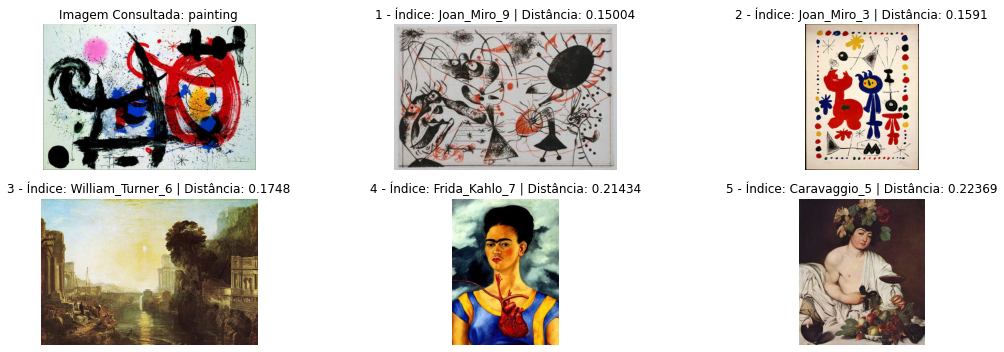

In [16]:
# inclua o código para obter as 5 imagens mais próximas com base nas distâncias computadas e exibi-las

# CRIA O DICIONARIO AUXILIAR
images_distances = {}

# REALIZA O CÁLCULO DA DISTÂNCIA EUCLIDIANA 
for image, desc in images_desc.items():
    images_distances[image] = np.sqrt( np.sum((images_desc['painting']-images_desc[image])**2) )

# ORDENA O DICIONÁRIO COM BASE NOS VALORES
images_distances = sorted(images_distances.items(), key= lambda kv: kv[1])

# EXIBIÃO DAS 5 PRIMEIRAS IMAGENS
print(images_distances[1:6], 5)
print(50*'__')

# EXIBIÇÃO DAS IMAGENS ENCONTRADAS
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
ax = axes.ravel()
for i in range(6):
    ax[i].imshow(imageio.imread('paintings/' + images_distances[i][0] + '.jpg'), cmap=plt.cm.gray);
    if i == 0:
      ax[i].set_title('Imagem Consultada: {}'.format(images_distances[i][0]))
    if i != 0:
      ax[i].set_title(f'{i} - Índice: {images_distances[i][0]} | Distância: {round(images_distances[i][1], 5)}')
    ax[i].axis('off')
fig.tight_layout()